In [64]:
import pandas as pd

df = pd.read_csv('data/지역별사교육참여율.csv')
# df.head()

In [65]:
df['시점'] = pd.to_datetime(df['시점'], format='%Y').dt.year
df = df[~df['지역별'].isin(['평균', '대도시', '대도시이외'])]
df['지역별'] = df['지역별'].replace({'중소도시': '대도시외', '읍면지역': '대도시외'})
df = df.groupby(['시점', '지역별'], as_index=False)['대상분포(%)'].sum()
# df.head(), df['지역별'].unique()

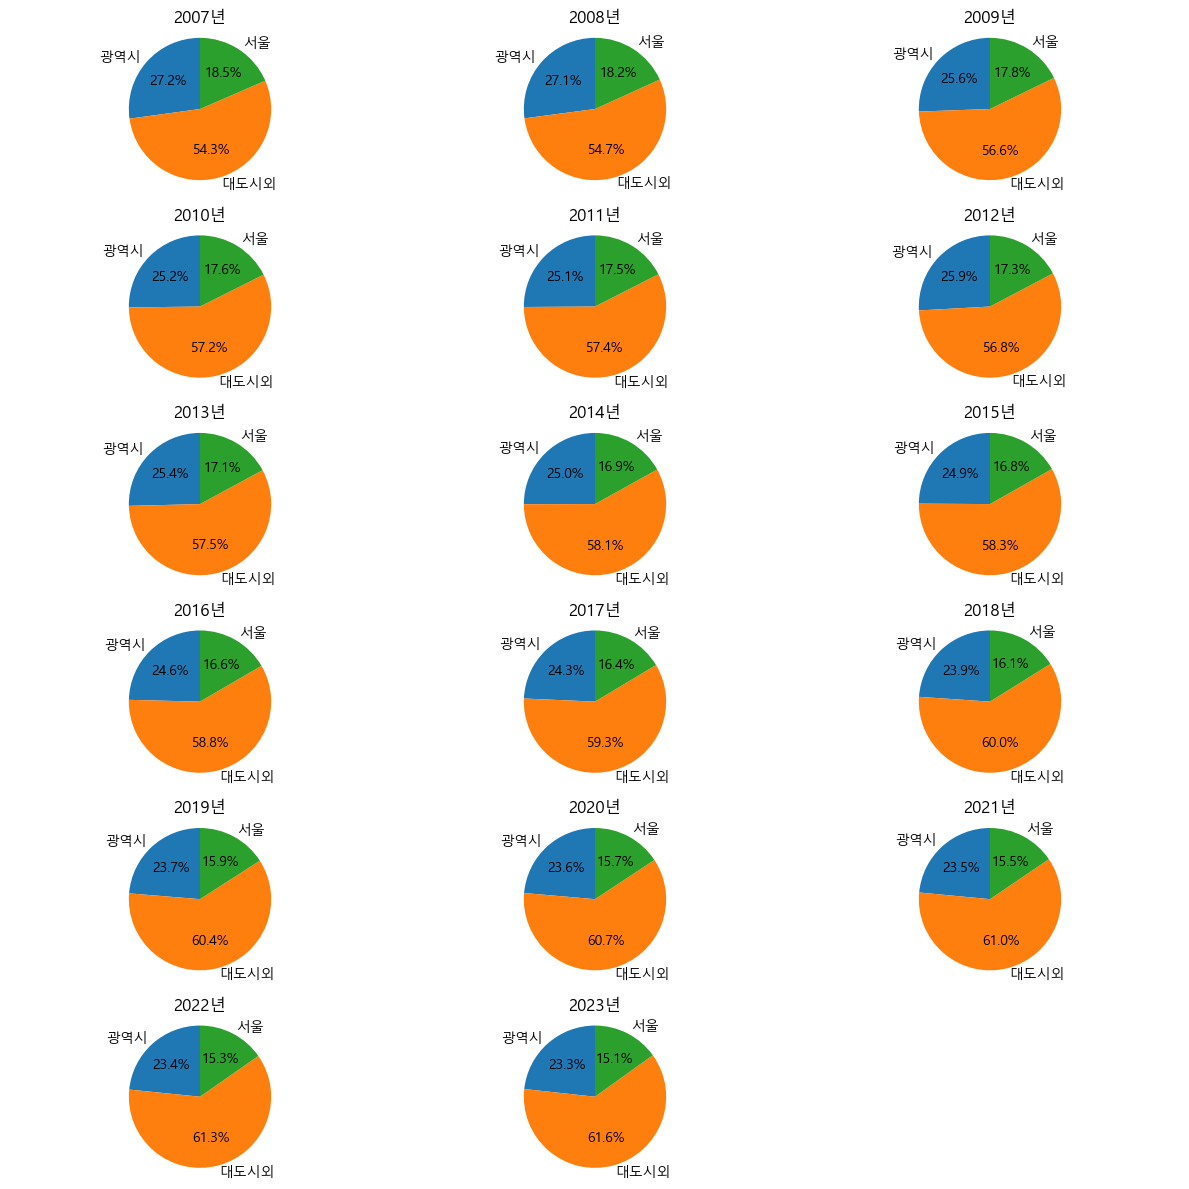

In [66]:
import matplotlib.pyplot as plt

# 폰트 깨짐 해결
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 고유한 시점 리스트
time_points = df['시점'].unique()

# 서브플롯 설정
num_plots = len(time_points)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # 필요한 행 수 계산

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

# 각 시점에 대해 파이 차트 생성
for i, time in enumerate(time_points):
    region_counts = df[df['시점'] == time].set_index('지역별')['대상분포(%)']
    
    # 파이 차트 생성
    ax = axes[i // ncols, i % ncols]  # 현재 위치 지정
    ax.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{time}년')  # 년도만 표시
    ax.axis('equal')  # 원형 차트로 보이게 설정

# 나머지 서브플롯은 빈 화면으로 유지
for j in range(num_plots, nrows * ncols):
    axes[j // ncols, j % ncols].axis('off')  # 해당 서브플롯 숨김

plt.tight_layout()
plt.show()

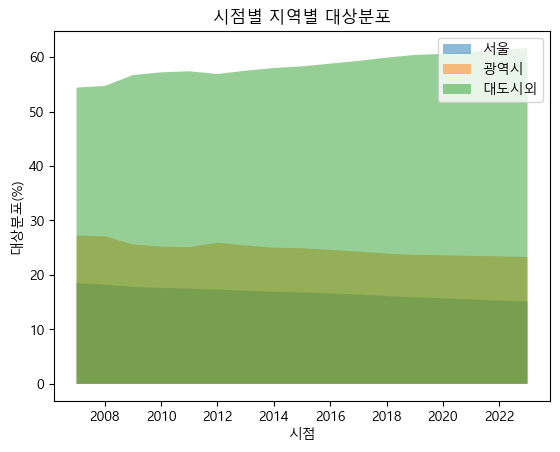

In [67]:
# 피벗 테이블 생성
pivot_df = df.pivot(index='시점', columns='지역별', values='대상분포(%)')

# 영역 차트
plt.fill_between(pivot_df.index, pivot_df['서울'], label='서울', alpha=0.5)
plt.fill_between(pivot_df.index, pivot_df['광역시'], label='광역시', alpha=0.5)
plt.fill_between(pivot_df.index, pivot_df['대도시외'], label='대도시외', alpha=0.5)

plt.title('시점별 지역별 대상분포')
plt.xlabel('시점')
plt.ylabel('대상분포(%)')
plt.legend()

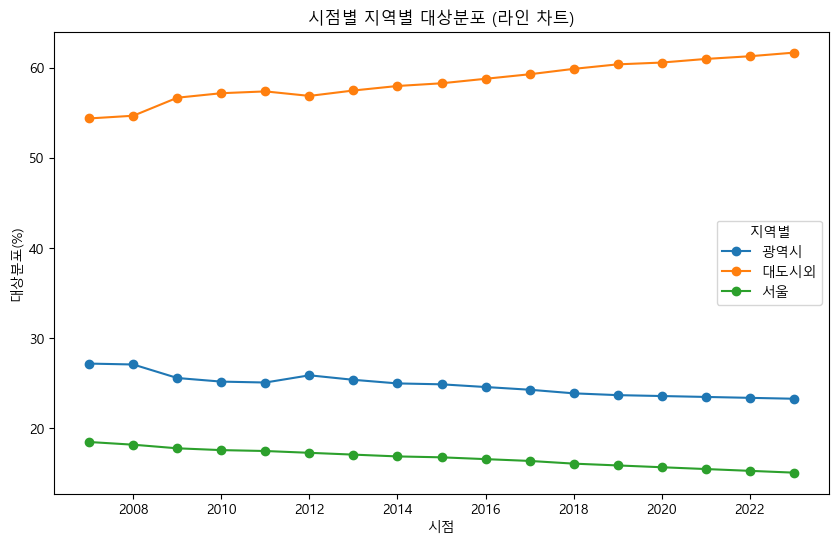

In [68]:
# 라인 차트
plt.figure(figsize=(10, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='o', label=column)

plt.title('시점별 지역별 대상분포 (라인 차트)')
plt.xlabel('시점')
plt.ylabel('대상분포(%)')
plt.xticks(rotation=0)
plt.legend(title='지역별')